# Day 1 "Sonar Sweep"

## Part 1

### Problem

You're minding your own business on a ship at sea when the overboard alarm goes off! You rush to see if you can help. Apparently, one of the Elves tripped and accidentally sent the sleigh keys flying into the ocean!

Before you know it, you're inside a submarine the Elves keep ready for situations like this. It's covered in Christmas lights (because of course it is), and it even has an experimental antenna that should be able to track the keys if you can boost its signal strength high enough; there's a little meter that indicates the antenna's signal strength by displaying 0-50 stars.

Your instincts tell you that in order to save Christmas, you'll need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

As the submarine drops below the surface of the ocean, it automatically performs a sonar sweep of the nearby sea floor. On a small screen, the sonar sweep report (your puzzle input) appears: each line is a measurement of the sea floor depth as the sweep looks further and further away from the submarine.

For example, suppose you had the following report:

        199
        200
        208
        210
        200
        207
        240
        269
        260
        263

This report indicates that, scanning outward from the submarine, the sonar sweep found depths of 199, 200, 208, 210, and so on.

The first order of business is to figure out how quickly the depth increases, just so you know what you're dealing with - you never know if the keys will get carried into deeper water by an ocean current or a fish or something.

To do this, count the number of times a depth measurement increases from the previous measurement. (There is no measurement before the first measurement.) In the example above, the changes are as follows:

        199 (N/A - no previous measurement)
        200 (increased)
        208 (increased)
        210 (increased)
        200 (decreased)
        207 (increased)
        240 (increased)
        269 (increased)
        260 (decreased)
        263 (increased)

In this example, there are 7 measurements that are larger than the previous measurement.

How many measurements are larger than the previous measurement?

### Setup

Parse and style.

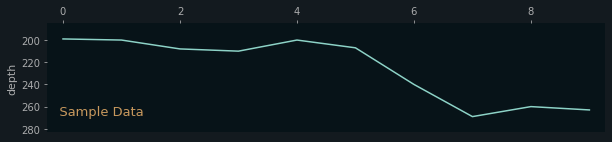

In [41]:
from utils import *

_input = initDay("day1")
_inputData = [int(x) for x in re.findall('\d+', _input)]

_sampleData = [199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

def plot(title, data):
    plotInvertY(.1)
    plt.ylabel("depth")
    plt.title('   ' + title)
    plt.plot(data)

plot('Sample Data', _sampleData)

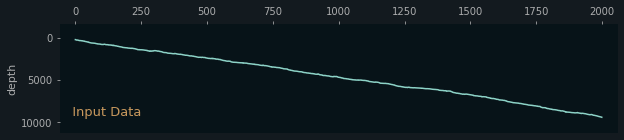

In [42]:
plot('Input Data', _inputData)

### Solver

Part 1 and 2 can use the same solver:

* Walk list of ints
* Sum a moving window of given size
* Count instances where a sum is greater than the previous sum

In [43]:
def solve(depths, window):
    last, count = 0, 0
    for i in range(len(depths) - window):
        s = sum(depths[i:i+window])
        count += 1 if s > last else 0
        last = s
    return count

### Solution

Window size = 1.

In [44]:
def solve1(depths):
    return solve(depths, 1)

check(solve1(_sampleData), 7)
check1(solve1(_inputData))

Part 1 Result: 1681


## Part 2

### Problem

Considering every single measurement isn't as useful as you expected: there's just too much noise in the data.

Instead, consider sums of a three-measurement sliding window. Again considering the above example:

        199  A
        200  A B
        208  A B C
        210    B C D
        200  E   C D
        207  E F   D
        240  E F G
        269    F G H
        260      G H
        263        H

Start by comparing the first and second three-measurement windows. The measurements in the first window are marked A (199, 200, 208); their sum is 199 + 200 + 208 = 607. The second window is marked B (200, 208, 210); its sum is 618. The sum of measurements in the second window is larger than the sum of the first, so this first comparison increased.

Your goal now is to count the number of times the sum of measurements in this sliding window increases from the previous sum. So, compare A with B, then compare B with C, then C with D, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.

In the above example, the sum of each three-measurement window is as follows:

        A: 607 (N/A - no previous sum)
        B: 618 (increased)
        C: 618 (no change)
        D: 617 (decreased)
        E: 647 (increased)
        F: 716 (increased)
        G: 769 (increased)
        H: 792 (increased)

In this example, there are 5 sums that are larger than the previous sum.

Consider sums of a three-measurement sliding window. How many sums are larger than the previous sum?

### Solution

Window size = 3.

In [45]:
def solve2(depths):
    return solve(depths, 3)

check(solve2(_sampleData), 5)
check2(solve2(_inputData))

Part 2 Result: 1704
